In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)
print(len(tf.config.list_physical_devices('GPU')))

2.9.1
0


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image=x_train[1]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

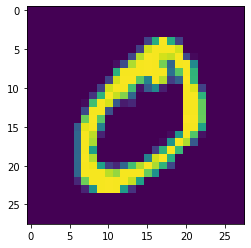

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example=to_categorical(y_train)

In [13]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_cat_test=to_categorical(y_test,10)
y_cat_train=to_categorical(y_train,10)

In [15]:
single_image.max()

255

In [16]:
single_image.min()

0

In [17]:
(x_train,x_test)=(x_train/255,x_test/255)

In [18]:
#batch size,width,height,color_channels
(x_train,x_test)=(x_train.reshape(60000,28,28,1),x_test.reshape(10000,28,28,1))

In [19]:
#training and creating the model using CNN

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:

model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

#output Layer----> multi class

model.add(Dense(10,activation='softmax'))

#keras.io/metrics

model.compile(loss='categorical_crossentropy',optimizer='adam',
metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [24]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1217 - accuracy: 0.9622 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0392 - val_accuracy: 0.9867


In [25]:
model.metrics_names

['loss', 'accuracy']

In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

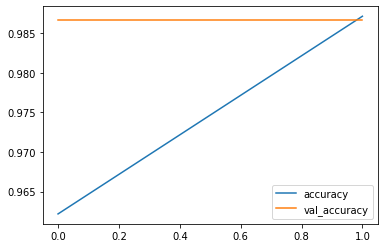

In [27]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

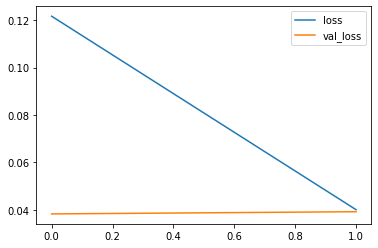

In [28]:
losses[['loss','val_loss']].plot()

In [29]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.03915025293827057, 0.9866999983787537]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [73]:
y_cat_test.shape

(10000, 10)

In [74]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [75]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [76]:
predictions=[]
for i in range(len(prediction)):
    predictions.append(prediction[i].argmax())

In [78]:
predictions=np.array(predictions)

In [79]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [80]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    1,    0,    0,    2,    0,    1,    1,    0],
       [   1, 1126,    2,    1,    0,    0,    1,    4,    0,    0],
       [   1,    0, 1023,    0,    0,    0,    0,    4,    4,    0],
       [   0,    0,    1,  995,    0,   11,    0,    2,    1,    0],
       [   0,    0,    0,    0,  976,    0,    2,    1,    2,    1],
       [   0,    0,    1,    5,    0,  886,    0,    0,    0,    0],
       [   5,    1,    0,    0,    3,   16,  932,    0,    1,    0],
       [   0,    1,   10,    1,    0,    1,    0, 1014,    1,    0],
       [   2,    0,    1,    1,    1,    5,    0,    0,  962,    2],
       [   1,    0,    0,    2,    4,   17,    0,    6,    1,  978]],
      dtype=int64)

In [81]:
import seaborn as sns

<AxesSubplot:>

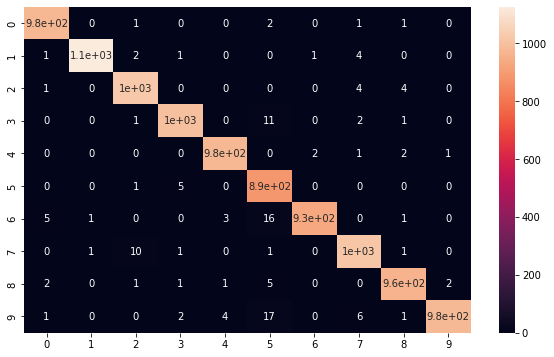

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [83]:
my_number = x_test[100]

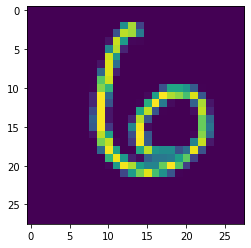

In [84]:
plt.imshow(my_number.reshape(28,28))

In [91]:
k=model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 11ms/step


In [92]:
k.argmax()

6

In [93]:
model.save('Mnist_model.h5')